<a href="https://colab.research.google.com/github/CZX4810/2017/blob/master/ADA_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Plot
https://matplotlib.org/cheatsheets/

https://seaborn.pydata.org/tutorial/function_overview.html

https://plotly.com/python/

# 数据读取
#### How to read .txt -- HW0

In [ ]:
tweets_data_path = './Data/twitter_data.txt'

tweets_data = []
with open(tweets_data_path, "r") as tweets_file:
    for line in tweets_file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue

tweets = pd.DataFrame()

fields = ['text','lang']
for f in fields:
    tweets[f] = list(map(lambda tweet: tweet[f], tweets_data))

tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data))
tweets['username'] = list(map(lambda tweet: tweet['user']['screen_name'], tweets_data))
tweets['followers_count'] = list(map(lambda tweet: tweet['user']['followers_count'], tweets_data))
tweets['time_zone'] = list(map(lambda tweet: tweet['user']['time_zone'], tweets_data))

tweets['text_len'] = list(map(lambda tweet: len(tweet), tweets['text']))

print('We got',len(tweets_data),'tweets.')

In [ ]:
# Handling_text_exercise_2_solution.ipynb -- 2018 Final
season = ""
episode = ""
scene = ""
data = []

with open("data/all_scripts.txt", encoding='utf-8') as f:
    for line in f.readlines():
        line = line[:-1]
        if line.startswith(">> "):
            season = int(line[10:12])
            episode = line[3:]
            continue
        if line.startswith("> "):
            scene = line[2:]
            continue
        character, line = line.split(": ", 1)
        data.append([season, episode, scene, character, line])

lines = pd.DataFrame(data, columns=["Season", "Episode", "Scene", "Character", "Line"])

lines.groupby(["Season", "Episode", "Scene"]).count().reset_index().groupby("Season").count()[["Scene"]]

#### How to read .csv -- HW1.1

In [ ]:
!head Data/microbiome.csv
mb = pd.read_csv("Data/microbiome.csv", sep=',', index_col=['Patient','Taxon'])
# skiprows=[3,4,6], nrows=4, na_values=['?', -99999] , usecols=columns
mb.index.is_unique

movies['worldwide_gross'] = movies['worldwide_gross'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
pop_per_commune = commune_pop[[name.startswith('......') for name in commune_pop.commune]].copy() #按照开头筛选

#导入包括时间变量时
segments = pd.read_csv("Data/transit_segments.csv", parse_dates=['st_time', 'end_time'], date_format='%m/%d/%y %H:%M', nrows=1000)

#也可以先普通导入，然后转化时间
youtube.upload_date = pd.to_datetime(youtube.upload_date)
##在此基础上提取年月
youtube['upload_year'] = youtube.upload_date.apply(lambda x: x.year)
youtube['upload_month'] = youtube.upload_date.apply(lambda x: x.month)

#另一种方法
g_text_adj = np.loadtxt(open('data/g_text_adj.csv', 'r'), delimiter=',', skiprows=0)
g_tags_adj = np.loadtxt(open('data/g_tags_adj.csv', 'r'), delimiter=',', skiprows=0)
g_text = from_numpy_array(g_text_adj)
g_tags = from_numpy_array(g_tags_adj)

#### How to read .csv.gz

In [ ]:
data1 = pd.read_csv('wiki-RfA.csv.gz', compression='gzip',
                   error_bad_lines=False)

#### How to read .json

In [ ]:
channel_to_index = json.load(open('data/channel_indices.json', 'r'))

#### How to read excel -- HW1.1

In [ ]:
mb = pd.read_excel('Data/microbiome_MID2.xls', sheet_name='Sheet 1', header=None)

#### requests: HW2/Data from the Web.ipynb

In [ ]:
import requests
from bs4 import BeautifulSoup
r = requests.get('https://httpbin.org/get?key1=value1')
page_body = r.text
soup = BeautifulSoup(page_body, 'html.parser')

publications_list = []
for p in publications_wrappers:
    title = p.find('span', class_='title').text  # get the title
    authos_list = p.find_all('span', {'itemprop': 'author'})  # get the authors list
    authors = [author.text for author in authos_list]
    year = p.find('span', {'itemprop': 'datePublished'}).text
    publications_list.append({'title': title,
                         'authors': authors,
                         'year': int(year)})  # here you should validate the data

publications = pd.DataFrame.from_dict(publications_list)
publications.head()

**HW2 1.1 对于是多层dict的某列**

dict_items([('1', {'scores': {'originality': 2, 'soundness_correctness': 2, 'substance': 3, 'replicability': 4, 'meaningful_comparison': 2, 'readability': 4, 'overall_score': 2}, 'contributions': {'nlp_tasks_applications': 'Marginal contribution', 'methods_algorithms': 'Marginal contribution', 'theoretical_algorithmic_results': None, 'empirical_results': 'Marginal contribution', 'data_resources': None, 'software_systems': None, 'evaluation_methods_metrics': None}, 'checks': {'appropriateness': 'Appropriate', 'adhere_to_acl_2018_guidelines': 'Yes', 'adhere_to_acl_author_guidelines': 'Yes', 'handling_of_data_resources': 'Yes', 'handling_of_human_participants': None}}), ('2', {'scores': {'originality': 3, 'soundness_correctness': 4, 'substance': 3, 'replicability': 4, 'meaningful_comparison': 3, 'readability': 4, 'overall_score': 3}, 'contributions': {'nlp_tasks_applications': 'Marginal contribution', 'methods_algorithms': 'Marginal contribution', 'theoretical_algorithmic_results': 'Marginal contribution', 'empirical_results': 'Marginal contribution', 'data_resources': None, 'software_systems': None, 'evaluation_methods_metrics': None}, 'checks': {'appropriateness': 'Appropriate', 'adhere_to_acl_2018_guidelines': 'Yes', 'adhere_to_acl_author_guidelines': 'Yes', 'handling_of_data_resources': None, 'handling_of_human_participants': None}}), ('3', {'scores': {'originality': 3, 'soundness_correctness': 4, 'substance': 4, 'replicability': 5, 'meaningful_comparison': 5, 'readability': 4, 'overall_score': 4}, 'contributions': {'nlp_tasks_applications': 'Moderate contribution', 'methods_algorithms': 'Moderate contribution', 'theoretical_algorithmic_results': 'Moderate contribution', 'empirical_results': 'Strong contribution', 'data_resources': None, 'software_systems': 'Moderate contribution', 'evaluation_methods_metrics': None}, 'checks': {'appropriateness': 'Appropriate', 'adhere_to_acl_2018_guidelines': 'No', 'adhere_to_acl_author_guidelines': 'Yes', 'handling_of_data_resources': 'Yes', 'handling_of_human_participants': None}})])
计算平均值

In [ ]:
# Loops through conditions
for period in ["before", "after"]:
    for func, desc in zip([np.mean, np.std], ["avg", "std"]): #zip 打包成元组

        # applies custom function to overall score of each inner JSON
        extract_avg_score = lambda xs: func([x['scores']["overall_score"] for _, x in xs.items()])
        #items()  列表转化为元组(key, value) tuple pairs.

        # gets overall score for each paper
        df["overall_score_{}_{}".format(period, desc)] = df["scores_{}".format(period)].apply(extract_avg_score)

#### 生成随机数据 HW8

# 数据清洗
#### 使用[] -- 更简洁

In [ ]:
#对每一行操作 Iterate over DataFrame rows as (index, Series) pair
#按照空格分开词
corpus_frequency = pd.concat([pd.Series(row['Line'].split(' ')) for _, row in lines.iterrows()]).reset_index() #pd.concat: Combine two Series
words_for_chars = pd.concat([pd.Series(row["Character"], row['Line'].split())
                             for _, row in train_set.iterrows()]).reset_index()

#判断某列是否是'quaker'
# let's also add a new attribute based on the role column. Is (s)he a directly involved Quaker or not?
nodes['Quaker'] = ['quaker' in role.lower() for role in nodes.Role]

#输出结尾为'bacteria'的行
bacteria[[name.endswith('bacteria') for name in bacteria.index]]

#筛选样本
data[data['phylum'].apply(lambda x: x.endswith('bacteria')) & data['value'].apply(lambda x: x>1000)]

#某行某列
baseball_newind.loc[:'myersmi01NYA2006', 'hr']

#### 常用处理

In [ ]:
#groupby计数
## 计数方法1 -- groupby 分组计数并显示某列
lines.groupby(["Season", "Episode", "Scene"]).count().reset_index().groupby("Season").count()[["Scene"]]
### 有时，我们需要计算累计的值
youtube.groupby('upload_year')['channel'].count().to_frame().fillna(0).cumsum()
### 另一种表达
youtube.loc[youtube.channel_cat == 'Gaming'].view_count.sum()

## 计数方法2 -- collections.Counter计数并转化为df
degreeCount = collections.Counter(degree_seq)
degreeCount = pd.DataFrame.from_dict(degreeCount, orient='index').reset_index()
fig = plt.figure()
ax = plt.gca()

#groupby删去重复
df.groupby('x').apply(lambda x: x.drop_duplicates('y')) #subset='channel',keep = 'first'

In [ ]:
#for
## 分组与for指定row
average_by_region = country_features.groupby("world_region")['happiness_score'].agg(['mean','size'])
for idx, row in country_features[country_features.literacy==100].iterrows():
    print("{} - {} ({})".format(row.world_region, row.country, row.happiness_score)) ##用for指定row

## 也可以用for指定dict里的key和value
for quaker, degree in sorted_degree[:5]:
    print(quaker, 'who is', quakerG.nodes[quaker]['Role'], 'knows', degree, 'people')

In [ ]:
# lamda
baseball['obp']=baseball.apply(lambda p: (p.h+p.bb+p.hbp)/(p.ab+p.bb+p.hbp+p.sf) if (p.ab+p.bb+p.hbp+p.sf) != 0.0 else 0.0, axis=1)
list(map((lambda x: -1 if x == 0 else 1), np.random.randint(2,size = len(df['VOT']))))
map(fun, iter)

#填补空值
X = X.fillna(X.mean())
len(X[X.isna().any(axis=1)])

nodes['Role'].fillna('Unknown', inplace=True)

#删除列
data_nomonth = data.drop('treatment', axis=1)
#删除行
recurrent_chars = recurrent_chars.drop("Man", axis=0)

#重复值
## check if the names are unique
len(nodes['Name'].unique()) == len(nodes)

## 只保留第一次出现的值
youtube.drop_duplicates(subset='channel',keep = 'first')

#重命名列
nodes = nodes.rename({'Historical Significance': 'Role'}, axis = 1)

#像Stata一样，将变量分类并赋予label
pd.cut(cdystonia.age, [20,40,60,80,90], labels=['young','middle-aged','old','really old'])


#标准化 z = (x - u) / s
scaled_features = StandardScaler().fit(seeds_features).transform(seeds_features)

#调用index
words_per_char[recurrent_chars.index]

#对字典排序
degrees = dict(quakerG.degree(quakerG.nodes()))
sorted_degree = sorted(degrees.items(), key=itemgetter(1), reverse=True)

#虚拟变量
## 方法1
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df['B'], prefix='onehot_')
# Drop column B as it is now encoded
df = df.drop('B',axis = 1)
# Join the encoded df
df = df.join(one_hot)

## 方法2
df_oneh = pd.concat([df, pd.get_dummies(df["track"])], axis=1)

#前缀后缀
#add_prefix and add_suffix
cdystonia_grouped.mean().add_suffix('_mean')

#生成是否大于阈值的虚拟变量
y_train_binary = (y_train > threshold).astype(int) #布尔值变为数值
#对于布尔值，我们也可以直接求mean()

# 数据可视化

In [ ]:
#-----------------------三张图画一起
import matplotlib.pyplot as plt

data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

axs[0].bar(names, values)

axs[1].scatter(names, values)

axs[2].plot(names, values)
axs[2].set_xlabel("Year")
axs[2].set_title("C) Avg. opponents' batting average per year");
fig.suptitle('Categorical Plotting')

#-----------------------联合图
sns.jointplot(data = movies, x = 'worldwide_gross', y = 'imdb_rating', kind="reg") kind="hex", kind="kde"

#------------------------散点图与回归图
per_capita_self_empl = df[['State','IncomePerCap', 'SelfEmployed']]
sn.lmplot(x='SelfEmployed',y='IncomePerCap', data=per_capita_self_empl)
plt.xlabel("Percentage of Self Employed people [%]")
plt.ylabel("Income per Capita [$]")

#-------------------------两个直方图+趋势线
ax = sns.histplot(treated['re78'], kde=True, stat='density', color='blue', label='treated')
ax = sns.histplot(control['re78'], kde=True, stat='density', color='orange', label='control')
ax.set(title='Income distribution comparison in 1978',xlabel='Income 1978', ylabel='Income density')
plt.legend()
plt.show()

#-------------------------hist & loglog hist
corpus_frequency.plot.hist(column=["Frequency"], bins=100, title="Frequency histogram")
corpus_frequency.plot.hist(column=["Frequency"], loglog=True, bins=np.logspace(0, 6, 100),
                           title="Frequency histogram (loglog scale)");
#logspace中，开始点和结束点是10的幂

#-------------------------每一列画hist
columns = seeds_features.columns
fig, axs = plt.subplots(1, len(columns), figsize=(14,2), sharex=True)
for column_idx in range(0, len(columns)):
    seeds_features[columns[column_idx]].hist(bins=20, ax=axs[column_idx], alpha=0.6)
    axs[column_idx].set_title(columns[column_idx])
plt.tight_layout()

#------------------------distribution line
sns.kdeplot(df[df["is_reject"]].overall_score_before_avg, label="rejected", ax=axs[0])
sns.kdeplot(df[~df["is_reject"]].overall_score_before_avg, label="accepted", ax=axs[0])

#------------------------成对关系
sns.pairplot(lalonde_data)

#-------------------------箱形图
lalonde_data.boxplot(by='treat', column='age', figsize = [5, 5], grid=True)
plt.show()

#-------------------------bar chart：对列画，只需要放入同一个df
a3.plot(kind='bar', figsize=(5,3))
plt.show()

## 也可以只画一个变量
plt.bar(x=vids_per_year[2].index, height=vids_per_year[2].title)
plt.xlabel('year')
plt.ylabel('videos')

**绘制时间序列的置信区间 HW1 3.5 —** Before showing the final results to Mr. Russo, you pass them by Ms. Sakota once more. She looks happier now, but still looks a bit concerned. She asks you to perform a sanity check on the missing data for the period you are considering. Specifically, she is worried that there are significantly more missing salaries for left-handed pitchers or for right-handed pitchers.

- Create a plot with 10 inches of width and 4 inches of height. The plot should depict the fraction of missing salary  salary for left and right-handed pitchers per year, show 95% confidence intervals in your plot.
- Print the fraction of left-handed pitchers with salary data missing for the year 2002.
- /Discuss:/ According to the plot, are there significantly more missing salaries for left-handed pitchers?

**simpson paradox**


avg salary in 1999 for lefties: 1272792.2753623188
avg salary in 1999 for righties: 1428778.4154727794
avg BAOpp in 1999 for lefties: 0.29194285714285717
avg BAOpp in 1999 for righties: 0.285780487804878


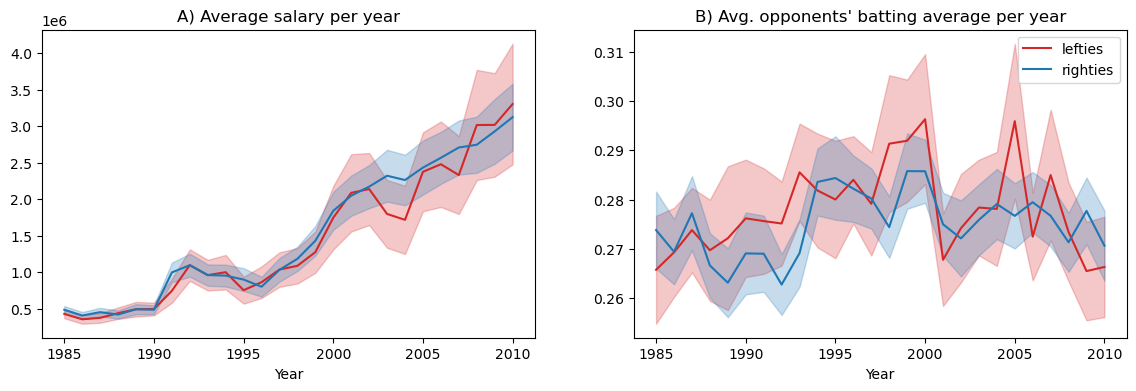

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14,4))

for idx, col_agg in enumerate(["salary", "BAOpp"]):
    df_col_agg = df.groupby(["yearID", "throws"])[col_agg].agg(["mean", "sem"]).reset_index()
    df_col_agg_L = df_col_agg[df_col_agg.throws == "L"]
    df_col_agg_R = df_col_agg[df_col_agg.throws == "R"]

    axs[idx].plot(df_col_agg_L["yearID"], df_col_agg_L["mean"], color="tab:red", label="lefties")
    axs[idx].fill_between(df_col_agg_L["yearID"], df_col_agg_L["mean"] - 1.96 * df_col_agg_L["sem"],
                     df_col_agg_L["mean"] + 1.96 * df_col_agg_L["sem"], alpha=0.25
                     , color="tab:red")

    axs[idx].plot(df_col_agg_R["yearID"], df_col_agg_R["mean"], color="tab:blue", label="righties")
    axs[idx].fill_between(df_col_agg_R["yearID"], df_col_agg_R["mean"] - 1.96 * df_col_agg_R["sem"] ,
                     df_col_agg_R["mean"] + 1.96 * df_col_agg_R["sem"], alpha=0.25
                     , color="tab:blue")

    print("avg", col_agg, "in 1999 for lefties:", df_col_agg_L[df_col_agg_L["yearID"] == 1999]["mean"].values[0])
    print("avg", col_agg, "in 1999 for righties:", df_col_agg_R[df_col_agg_R["yearID"] == 1999]["mean"].values[0])

axs[0].set_title("A) Average salary per year")
axs[1].set_title("B) Avg. opponents' batting average per year")
axs[0].set_xlabel("Year")
axs[1].set_xlabel("Year")
plt.legend()

**3.5 —** Before showing the final results to Mr. Russo, you pass them by Ms. Sakota once more. She looks happier now, but still looks a bit concerned. She asks you to perform a sanity check on the missing data for the period you are considering. Specifically, she is worried that there are significantly more missing salaries for left-handed pitchers or for right-handed pitchers.

- Create a plot with 10 inches of width and 4 inches of height. The plot should depict the fraction of missing salary  salary for left and right-handed pitchers per year, show 95% confidence intervals in your plot.
- Print the fraction of left-handed pitchers with salary data missing for the year 2002.
- /Discuss:/ According to the plot, are there significantly more missing salaries for left-handed pitchers?


Percent missing 2002: 0.3817204301075269


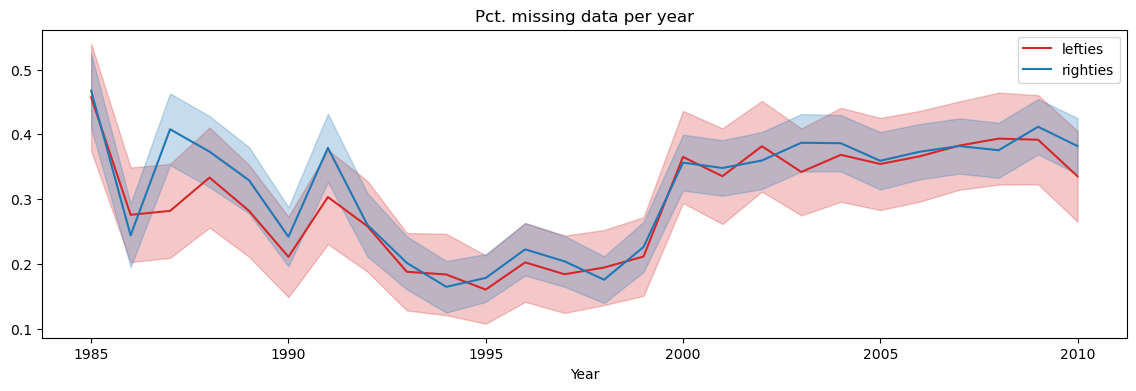

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(14,4))

axs = [axs]
for idx, col_agg in enumerate(["salary"]):
    col_agg2 = "is_na" + col_agg
    df[col_agg2] = (df["salary"].isna()).astype(int)
    df_col_agg = df.groupby(["yearID", "throws"])[col_agg2].agg(["mean", "sem"]).reset_index()
    df_col_agg_L = df_col_agg[df_col_agg.throws == "L"]
    df_col_agg_R = df_col_agg[df_col_agg.throws == "R"]
    print("Percent missing 2002:", df_col_agg_L[df_col_agg_L.yearID == 2002]["mean"].values[0])
    axs[idx].plot(df_col_agg_L["yearID"], df_col_agg_L["mean"], color="tab:red", label="lefties")
    axs[idx].fill_between(df_col_agg_L["yearID"], df_col_agg_L["mean"] - 1.96 * df_col_agg_L["sem"],
                     df_col_agg_L["mean"] + 1.96 * df_col_agg_L["sem"], alpha=0.25
                     , color="tab:red")
    axs[idx].plot(df_col_agg_R["yearID"], df_col_agg_R["mean"], color="tab:blue", label="righties")
    axs[idx].fill_between(df_col_agg_R["yearID"], df_col_agg_R["mean"] - 1.96 * df_col_agg_R["sem"] ,
                     df_col_agg_R["mean"] + 1.96 * df_col_agg_R["sem"], alpha=0.25
                     , color="tab:blue")
axs[0].set_title("Pct. missing data per year")
axs[0].set_xlabel("Year")
plt.legend();


其他见 HW2 (02 - Data viz and data from the web/Becoming a DataVizard solution.ipynb)

**HW1** **2.1 —** Plot the Complementary cumulative distribution function (CCDF) of salary for left-handed and right-handed athletes. Consider data from all years.


In [ ]:
import seaborn as sns
import warnings

# Creates complementary CDF
sns.ecdfplot(df[df["throws"] == "L"].salary, label="Left-handed", complementary=True)
sns.ecdfplot(df[df["throws"] == "R"].salary, label="Right-handed", complementary=True)
#plt.xscale("log") #to log the x-axis.
plt.legend()
plt.title("CCDF Salary")

**FINAL22 1.5**
Plot the **complementary** cumulative distribution of the degree centrality of the undirected graph. Use a logarithmic (base 10) x-axis and a linear y-axis.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.ecdfplot(list(dict(G.degree()).values()), complementary=True)
plt.xscale("log")
plt.axvline(10)
plt.axhline(0.4)
plt.title("Complementary CDF")
plt.xlabel("Degree centrality")

# 数据描述

In [ ]:
#判断分布
#does the data come from a normal distrbution?
diagnostic.kstest_normal(df['IncomePerCap'].values, dist = 'norm')

#how about exponential?
diagnostic.kstest_normal(df['IncomePerCap'].values, dist = 'exp')

(0.0637621121184162, 0.0009999999999998899)

p_value < 0.05 -> we can reject the null hypothesis that the data comes from a normal/exponential distribution!

In [ ]:
#选取部分样本
#here we sample by upsampling counties with large population
sample2_counties = df.sample(n = 10, replace = False, weights = df['TotalPop'])

#relationship
stats.pearsonr(df['IncomePerCap'],df['Employed'])
stats.spearmanr(df['IncomePerCap'],df['Employed'])

#Hypothesis testing -- t-test
## EG1
import scipy.stats
x1 = df[(df["throws"] == "L")].salary.dropna().values
x2 = df[(df["throws"] == "R")].salary.dropna().values
print(np.mean(x1), np.mean(x2))
display(scipy.stats.ttest_ind(x1, x2))

## EG2 (plot)
stats.ttest_ind(df.loc[df['State'] == 'New York']['IncomePerCap'], df.loc[df['State'] == 'California']['IncomePerCap'])

ax = sns.barplot(x="State", y="IncomePerCap", data=df.loc[df['State'].isin(['New York','California'])]) #plot
plt.ylim([25000,32000])
sn.lmplot(x='SelfEmployed',y='IncomePerCap', data=SetA_per_capita_self_empl, hue = 'State') #为不同state分别画图

In a new groundbreaking study, 28 out of 100 patients reported improvements after taking a new medicine. It is known that, when given a placebo, 20% of the patients report feeling better. What is the p-value assuming the null hypothesis that the probability of successful treatment in this groundbreaking study is the same as the probability of reporting feeling better under placebo, according to a one-sided binomial test? Hint: you may use the statsmodels.stats.proportion.binom_test function.

In [ ]:
#The correct answer: c) 0.034
from statsmodels.stats import proportion
print(proportion.binom_test(28, 100, 0.2, alternative='larger'))

In [ ]:
#自己计算置信区间
## 方法1 -- 如果无需画图
import numpy as np

def bootstrap_confidence_interval(data, iterations=1000):
    """
    Bootstrap the 95% confidence interval for the mean of the data.

    Parameters:
    - data: An array of data
    - iterations: The number of bootstrap samples to generate

    Returns:
    - A tuple representing the lower and upper bounds of the 95% confidence interval
    """
    means = np.zeros(iterations)

    for i in range(iterations):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        means[i] = np.mean(bootstrap_sample)

    lower_bound = np.percentile(means, 2.5)
    upper_bound = np.percentile(means, 97.5)

    return (lower_bound, upper_bound)

# Example usage:
data = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
print(bootstrap_confidence_interval(data))

In [ ]:
## 方法2 -- 如果需要画出error bar
import seaborn as sns

salaries = df.groupby(["throws"]).salary.agg(["mean", "sem"])
salaries["low_ci"] = salaries["mean"] - 1.96 * salaries["sem"]
salaries["high_ci"] = salaries["mean"] + 1.96 * salaries["sem"]

# shows confidence intervals
display(salaries)

# simple plot
sns.pointplot(x="throws", y="salary", data=df_pitching)
plt.title("Average salary for left-\nand right-handed throwers");

# 回归

Equations are specified using patsy formula syntax. Important operators are:

~ : Separates the left-hand side and right-hand side of a formula.

\+ : Creates a union of terms that are included in the model.

\: : Interaction term.

\* : a * b is short-hand for a + b + a:b, and is useful for the common case of wanting to include all interactions between a set of variables.
Intercepts are added by default.

Categorical variables can be included directly by adding a term C(a). More on that soon!


In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df,test_size=0.1, random_state=42)

In [ ]:
# let's standardize the continuous features
lalonde_data['age'] = (lalonde_data['age'] - lalonde_data['age'].mean())/lalonde_data['age'].std()


# Balancing the dataset via matching
def get_similarity(propensity_score1, propensity_score2):
    '''Calculate similarity for instances with given propensity scores'''
    return 1-np.abs(propensity_score1-propensity_score2)
# Separate the treatment and control groups
treatment_df = lalonde_data[lalonde_data['treat'] == 1]
control_df = lalonde_data[lalonde_data['treat'] == 0]

# Create an empty undirected graph
G = nx.Graph()

# Loop through all the pairs of instances
for control_id, control_row in control_df.iterrows():
    for treatment_id, treatment_row in treatment_df.iterrows():

        # Calculate the similarity
        similarity = get_similarity(control_row['Propensity_score'],
                                    treatment_row['Propensity_score'])

        # Add an edge between the two instances weighted by the similarity between them
        G.add_weighted_edges_from([(control_id, treatment_id, similarity)])

# Generate and return the maximum weight matching on the generated graph
matching = nx.max_weight_matching(G)
matched = [i[0] for i in list(matching)] + [i[1] for i in list(matching)]
balanced_df_1 = lalonde_data.iloc[matched]


# Balancing the groups further
for control_id, control_row in control_df.iterrows():
    for treatment_id, treatment_row in treatment_df.iterrows():

        # Adds an edge only if the individuals have the same race
        if (control_row['black'] == treatment_row['black'])\
            and (control_row['hispan'] == treatment_row['hispan']):
            similarity = get_similarity(control_row['Propensity_score'],
                                        treatment_row['Propensity_score'])

            G.add_weighted_edges_from([(control_id, treatment_id, similarity)])

### match
 **HW2 4.1** Perform exact one-to-one matching considering the `overall_score_before_avg` and the `track` variables. Each paper that had a rebuttal ("treatment group") should be matched to a paper that did not have a rebuttal ("control group").
- Your matching should be optimal, i.e., the maximum amount of papers possible must be matched.

**一对一匹配，值完全相等**

In [ ]:
# split between control and treatment group
df_oneh = df_oneh.reset_index()
acl_had_rebuttal_df = df_oneh[df_oneh["had_rebuttal_int"] == 1]
acl_no_rebuttal_df = df_oneh[df_oneh["had_rebuttal_int"] == 0]

# create a graph of one-to-one matching
G = nx.Graph()

# do one-to-one matching between the two groups using exact matching on the following variables:
# score_before_avg and track
# note: since we loop starting with treatment group, it will match on lowest id
for acl_had_rebuttal_idx, acl_had_rebuttal_row in acl_had_rebuttal_df.iterrows():
    for acl_no_rebuttal_idx, acl_no_rebuttal_row in acl_no_rebuttal_df.iterrows():
        if acl_had_rebuttal_row["overall_score_before_avg"] == acl_no_rebuttal_row["overall_score_before_avg"]\
        and acl_had_rebuttal_row["track"] == acl_no_rebuttal_row["track"]:
            G.add_weighted_edges_from([(acl_had_rebuttal_row["tmp_id"], acl_no_rebuttal_row["tmp_id"], 1)])

# compute the maximum weight matching
matching = nx.max_weight_matching(G)

matched = [i[0] for i in list(matching)] + [i[1] for i in list(matching)]
balanced_acl_df = df_oneh[df_oneh["tmp_id"].isin(matched)]

### linear regression

In [ ]:
mod = smf.ols(formula='time ~ C(diabetes) + C(high_blood_pressure)', data=df)
mod = smf.ols(formula='time ~ C(high_blood_pressure) * C(DEATH_EVENT,  Treatment(reference=0)) + C(diabetes)',
              data=df)
np.random.seed(2)
res = mod.fit()
print(res.summary())

#----------另一种方法 HW6
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales
lin_reg = LinearRegression()  # create the model
lin_reg.fit(X, y)  # train it

#仅用于显示回归的方程
'''
for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(lin_reg.coef_[f], feature_cols[f]))
print(lin_reg.intercept_)
'''

lr = LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, y, cv=5)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

#-----------如果样本过少，overfitting, Solution: Regularization
ridge = Ridge(alpha=6) #Constant that multiplies the L2 term, controlling regularization strength.

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted_r = cross_val_predict(ridge, X, y, cv=5)

# 回归图像
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y, predicted_r, edgecolors=(0, 0, 0))
ax.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

###   Ridge

1. Train a **ridge regression model (i.e., an L2-regularized linear regression model)** on the train set that predicts the view count from the other features. Find and use the optimal regularization parameter $\alpha$ from the set {0.001, 0.01, 0.1} via 3-fold cross validation.

In [ ]:
ridge = Ridge()
ridge_hyper = {'alpha':(0.001, 0.01, 0.1)}
ridge_cv = GridSearchCV(ridge, ridge_hyper, cv=3) #cv -- K折交叉验证（K-Folder Cross Validation）
ridge_cv.fit(X_train, y_train)

ridge_cv.cv_results_['mean_test_score']

#the mean absolute error that the model makes on the test set
mean_absolute_error(y_test, ridge_cv.predict(X_test))

### Logistic regression

In [ ]:
#Logistic regression
mod = smf.logit(formula='DEATH_EVENT ~  age + creatinine_phosphokinase + ejection_fraction + \
                        platelets + serum_creatinine + serum_sodium + \
                        C(diabetes) + C(high_blood_pressure) +\
                        C(sex) + C(anaemia) + C(smoking) + C(high_blood_pressure)', data=df)
# Having two other positive edges in the triangle increase the log odds of a positive edge by around 0.25

def p_to_log_odds(p):
    return np.log(p/(1-p))
def log_odds_to_p(odds):
    return np.exp(odds) / (1+ np.exp(odds))

#----------另一种方法，同时计算recall等，并画图
X = pd.get_dummies(titanic[titanic_features])
logistic = LogisticRegression(solver='lbfgs')

precision = cross_val_score(logistic, X, y, cv=10, scoring="precision")
recall = cross_val_score(logistic, X, y, cv=10, scoring="recall")

# Precision: avoid false positives
print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
# Recall: avoid false negatives
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))

# Predict the probabilities with a cross validationn
y_pred = cross_val_predict(logistic, X, y, cv=10, method="predict_proba")
# Compute the False Positive Rate and True Positive Rate
fpr, tpr, _ = roc_curve(y, y_pred[:, 1])
# Compute the area under the fpt-tpf curve
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Area = {:.5f}".format(auc_score));

#预测拟合值
test = [25, 0, 0, 100, 0, 1]
"YES" if logistic.predict([test])[0] > 0 else "NO"
logistic.predict_proba([test])

Let's fit the regularized logistic regression. We will crossvalidate the regularization parameter on the training set. -- **Handling_text_exercise_1_solution**

In [ ]:
accs = []

#the grid of regularization parameter
grid = [0.01,0.1,1,10,100,1000,10000]

for c in grid:

    #initialize the classifier
    clf = LogisticRegression(random_state=0, solver='lbfgs',C = c) ## c Inverse of regularization strength

    #crossvalidate
    scores = cross_val_score(clf, X_train,Y_train, cv=10)
    accs.append(np.mean(scores))

plt.plot(accs)
plt.xticks(range(len(grid)), grid)
plt.xlabel('Regularization parameter \n (Low - strong regularization, High - weak regularization)')
plt.ylabel('Crossvalidation accuracy')
plt.ylim([0.986,1])

# Let's train again, on the entire training set, with the chosen regularization parameter. We will test on the test set
clf = LogisticRegression(random_state=0, solver='lbfgs',C = 10).fit(X_train,Y_train)

#predict on the test set
print('Accuracy:',clf.score(X_test,Y_test))

**如果想迭代直接获得最优解**

Train a logistic regression model for this classification task. Find and use the optimal regularization parameter C (as defined in scikit-learn's documentation) from the set {1, 10, 100} via 3-fold cross validation. Use the random seed 42. Hint: If you get a warning about the training algorithm failing to converge, increase the maximum number of training iterations.

In [ ]:
Cs = (1, 10, 100)
log_reg_cv = LogisticRegressionCV(Cs=Cs, cv=3, random_state=42, max_iter=200)

log_reg_cv.fit(X_train, y_train_binary)
opt_C = log_reg_cv.C_[0]
opt_C

log_reg_cv.scores_[1].mean(axis=0) #the cross-validation scores

#the accuracy of the logistic regression model on the test set
log_reg_cv.score(X_test, y_test_binary)

### 提取结果

In [ ]:
# feature names
variables = res.params.index

# quantifying uncertainty!

# coefficients
coefficients = res.params.values

# p-values
p_values = res.pvalues

# standard errors
standard_errors = res.bse.values

#confidence intervals
res.conf_int()

#MSE
mean_squared_error(y, predicted)

In [ ]:
#cross_validate
model1 = GradientBoostingClassifier()
cv_results1 = cross_validate(model1, X, y, cv=30, scoring=("accuracy", "precision", "recall"))
print(f"cv_results1: accuracy={cv_results1['test_accuracy'].mean()}, \
precision={cv_results1['test_precision'].mean()}, recall={cv_results1['test_recall'].mean()}")

### 可视化结果

In [ ]:
#------------可视化置信区间，用error bar
l1, l2, l3, l4 = zip(*sorted(zip(coefficients[1:], variables[1:], standard_errors[1:], p_values[1:])))

# in this case, we index starting from the first element, not to plot the intercept

# we will use standard errors, instead of CIs
# two standard errors approximate the CIs (you can actually see in the summary table that
# +/2 SI is equivalent to the CIs)
#fancy plotting

plt.errorbar(l1, np.array(range(len(l1))), xerr= 2*np.array(l3), linewidth = 1,
             linestyle = 'none',marker = 'o',markersize= 3,
             markerfacecolor = 'black',markeredgecolor = 'black', capsize= 5)

plt.vlines(0,0, len(l1), linestyle = '--')

plt.yticks(range(len(l2)),l2);

#------------------可视化系数，用Bar chart
tmp = []
for name, value in zip(train_features_std.columns, logistic.coef_[0]):
    tmp.append({"name": name, "value": value})

features_coef = pd.DataFrame(tmp).sort_values("value")
features_coef.head()
plt.subplots(figsize=(5,7))
plt.barh(features_coef.name, features_coef.value, alpha=0.6)

#### 06 - Learning from data - Supervised learning

**K-NN; Random Forest model (supervised classification/regression, but NOT a clustering algorithm)**


---



#### 07 - Learning from data - Applied machine learning
**logistic; Confusion matrix (TP, FP); accuracy, precision, recall, F1_score**


---


#### 08 - Learning from data - Unsupervised learning
**K-means clustering (animate your plots, Silhouette score, Elbow method); t-SNE; PCA1; DBSCAN**


---


#### 09 - Handing text/Handling_text_exercise_1_solution.ipynb

**Sentence splitting; Tokenization; speech tagging; Named entity recognition; Removing stop words; Lemmatization; Chunking (shallow parsing)浅层句法分析; Dependancy parsing依存分析; Sentiment analysis; Document classification; Topic detection; Semantic analysis based on lexical categories**


---





#### 10 - Handling networks
*    **Networkx 画网结构图; Sparsity; Connected Components; Katz Centrality; Betweeness centrality;**

*    **Community detection (Girvan Newman 逐步拆解, Louvain 逐步融合)**

**1.度：与节点直接相连的边数**

平均度(Degree)：有多少节点与之相连 https://docs.google.com/presentation/d/1SQ_rHZRsCIAYY9swRVXWtjTbjCuCItgegxnYGJo2naQ/edit#slide=id.g2a0284f6fd_0_0

平均接近中心度(Closeness)：最短路径长度的倒数

平均中介中心度(Betweenness)：一个节点担任其他两个节点最短路径桥梁的次数

度最大值节点(Node)：度数越多的节点在网络中的重要性越强

平均路径长度(Average path length)：连接两个节点的最短路径上边的数目

最大直径(Diameter)：存在有限距离的节点之间距离的最大值

**2.密度**

平均密度(Density)：网络中线路长度与面积的比。网络中的连接数越多，网络密度越大。

**3.集聚**

集聚系数(Clustering)：节点之间结成团的程度。整体集聚系数为所有闭三点组和所有连通三点组数量的比值。

**4.其他**

顶点数(Node Number/Vertex)：节点数

连边数(Edge/Arc)：连接顶点的边数

孤立点(Isolated vertex): 度为0的点，即没有点与之相连


In [ ]:
#将df导入network
G = nx.from_pandas_edgelist(pd.read_csv("./wiki-RfA.csv.gz"),
                            'SRC', 'TGT', ['VOT', 'RES', 'YEA', 'DAT'], create_using=nx.Graph)

#连接的个数
networkx.number_connected_components(g_text)

**FINAL19** 如何选最代表性的node？one channel

They can use either betweenness centrality (number of shortest paths passing through the node, i.e. the channel) or just the degree.

In [ ]:
centralities = networkx.betweenness_centrality(g_text)
#结果是一个字典

#对字典降序排列，并输出第一高的
highest_centrality_node = sorted(centralities.keys(), key=lambda x: centralities[x], reverse=True)[0]
{v:k for k,v in channel_to_index.items()}[highest_centrality_node] #channel_to_index是读入的数据

**FINAL22** Plot the complementary cumulative distribution of the degree centrality of the undirected graph. Use a logarithmic (base 10) x-axis and a linear y-axis.

In [ ]:
sns.ecdfplot(list(dict(G.degree()).values()), complementary=True)
plt.xscale("log")
plt.axvline(10)
plt.axhline(0.4)
plt.title("Complementary CDF")
plt.xlabel("Degree centrality")


#### 11 - Scaling Up

**PySpark**

In [ ]:
#merge
missions_joined = Bombing_Operations.join(Aircraft_Glossary, Bombing_Operations.AirCraft == Aircraft_Glossary.AirCraft)

#tutorial -- 大量分组计数的练习
## 方法1 -- groupBy分组，count("*")对行计数，.sort(desc("MissionsCount"))排序
  ### EX1
    jun_29_operations.groupBy("ContryFlyingMission").agg(count("*").alias("MissionsCount")).toPandas()
  ### EX2 What is the most used aircraft type during the Vietnam war (number of missions)?
    missions_aircrafts.groupBy("AirCraftType").agg(count("*").alias("MissionsCount"))\
                      .sort(desc("MissionsCount"))\
                      .show()

## 方法2 -- pure SQL What is the most used aircraft type during the Vietnam war (number of missions)?
    Bombing_Operations.registerTempTable("Bombing_Operations")
    Aircraft_Glossary.registerTempTable("Aircraft_Glossary")
#Bombing_Operations和Aircraft_Glossary的合并列AirCraft
    query = """
    SELECT AirCraftType, count(*) MissionsCount
    FROM Bombing_Operations bo
    JOIN Aircraft_Glossary ag
    ON bo.AirCraft = ag.AirCraft
    GROUP BY AirCraftType
    ORDER BY MissionsCount DESC
    """

    spark.sql(query).show()

## 方法3 -- 先把每个样本记为1，再一个一个加起来
    all_locations = jun_29_operations.rdd.map(lambda row: (row.TakeoffLocation, 1))
    locations_counts_rdd = all_locations.reduceByKey(lambda a, b: a+b).sortBy(lambda r: -r[1]) #.reduceByKey(lambda a, b: a+b) 累加


    locations_counts_with_schema = locations_counts_rdd.map(lambda r: Row(TakeoffLocation=r[0], MissionsCount=r[1])) #组成列表
    locations_counts = spark.createDataFrame(locations_counts_with_schema)
    locations_counts.show()

#Get a sample with take()
Bombing_Operations.take(3)

exercise还没看

**FINAL22**

TASK1 -- 1h 1.5

TASK2 -- 1h 2.2

TASK3 -- 3.3 理解错了 Randomly sample the entire dataset (i.e., votes from the dataframe constructed in task 3.1) with replacement; 3.5

In [ ]:
df_sample = merged_df.sample(frac=1, replace=True)

**FINAL19**

A1.2 -- 理解有问题

A1.3 -- Normalize: 直接两个相除

A2.1B -- 看明白那几个变量需要groupby，分组后先删除重复。答案似乎有问题

C2 -- network 和 clustering
